# Content

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for processing. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# Data

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). 

# Business Challenge

Traditionally, the diagnosis of bactarial/viral pneuomonia takes place when a radiologist examines an xray and makes a diagnosis. However, the use of deep lerning techniques to detect pneumonia can add a layer of objectivity in this diagnostic process. Deploying machine learning systems in the healthcare industry can facilitate early disease detection and reduce the presence of false positives and false negatives. 

# Ackowledgements 

https://data.mendeley.com/datasets/rscbjbr9sj/2



# 1. Importing Data & Libraries

In [1]:
# Libraries
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

# Working directory
os.chdir(r"C:\Users\WALEED AMJAD ALI\Desktop\Data_Science\Datasets")

# File paths train/validatio/test
train_path = r"C:\Users\WALEED AMJAD ALI\Desktop\Data\New folder\train"
test_path = r"C:\Users\WALEED AMJAD ALI\Desktop\Data\New folder\test"
validation_path = r"C:\Users\WALEED AMJAD ALI\Desktop\Data\New folder\validation"

# 2. Data Preprocessing

Found 2000 files belonging to 2 classes.


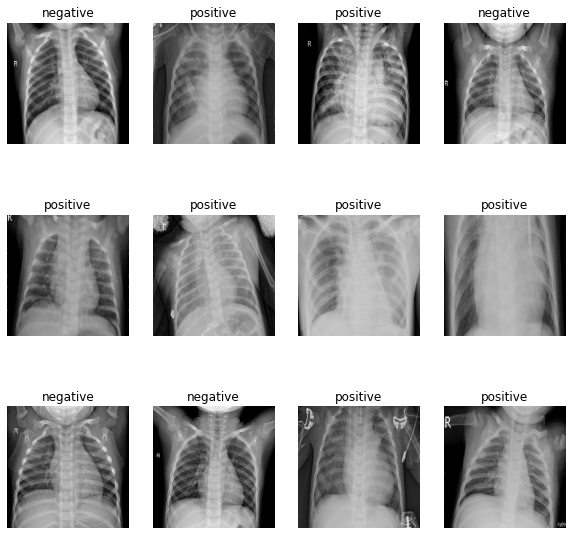

In [2]:
# lets plot some images from the training set
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path)
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(12): 
        plt.subplot(3, 4, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [3]:
# Data Generator API 
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)

valid_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)

test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
rescale = 1.0 / 255)

In [4]:
# Call Keras's flow from directory method
train_set = train_data_generator.flow_from_directory(
    train_path,
    target_size = (224, 224),
    class_mode = 'binary',
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = True
)

validation_set = test_data_generator.flow_from_directory(
    validation_path,
    target_size = (224, 224),
    class_mode = 'binary',
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = True
)


test_set = test_data_generator.flow_from_directory(
    test_path,
    target_size = (224, 224),
    class_mode = 'binary',
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = False
)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# 3. Model Preprocessing & Deployment

In [5]:
# Sequential API
model = tf.keras.Sequential([
    layers.Conv2D(32, 3,activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3,activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
])

In [6]:
# Configure hyperparameters and accuracy metrics
model.compile(
optimizer = 'adam',
loss = 'binary_crossentropy',
metrics = ['accuracy',                     
           tf.keras.metrics.AUC(name = 'AUC'),
           tf.keras.metrics.Precision(name = 'Precision'),
           tf.keras.metrics.Recall(name = 'Recall')])

# Train the model 
model_base = model.fit(
    train_set,
    batch_size = 32,
    validation_data = validation_set,
    epochs = 10,)

Epoch 1/10
63/63 [==============================] - 26s 357ms/step - loss: 0.5259 - accuracy: 0.7535 - AUC: 0.8389 - Precision: 0.7917 - Recall: 0.6880 - val_loss: 0.2079 - val_accuracy: 0.9000 - val_AUC: 0.9754 - val_Precision: 0.9444 - val_Recall: 0.8500
Epoch 2/10
63/63 [==============================] - 15s 230ms/step - loss: 0.1525 - accuracy: 0.9440 - AUC: 0.9858 - Precision: 0.9458 - Recall: 0.9420 - val_loss: 0.1330 - val_accuracy: 0.9500 - val_AUC: 0.9901 - val_Precision: 0.9327 - val_Recall: 0.9700
Epoch 3/10
63/63 [==============================] - 15s 240ms/step - loss: 0.0938 - accuracy: 0.9700 - AUC: 0.9940 - Precision: 0.9700 - Recall: 0.9700 - val_loss: 0.1234 - val_accuracy: 0.9500 - val_AUC: 0.9923 - val_Precision: 0.9787 - val_Recall: 0.9200
Epoch 4/10
63/63 [==============================] - 16s 248ms/step - loss: 0.0974 - accuracy: 0.9640 - AUC: 0.9939 - Precision: 0.9668 - Recall: 0.9610 - val_loss: 0.1282 - val_accuracy: 0.9500 - val_AUC: 0.9936 - val_Precision: 

# 4. Model Evaluation

In [7]:
# Model Results on the Test set
def result():
    
    results = model_base.model.evaluate(test_set, verbose = 0)
    accuracy = results[1]
    auc = results[2]
    precision = results[3]
    recall = results[4]
    print("Accuracy:  {:.2f}".format(accuracy))
    print("AUC:  {:.2f}".format(auc))
    print("Precision:  {:.2f}".format(precision))
    print("Recall:  {:.2f}".format(recall))
    return result

result()

Accuracy:  0.96
AUC:  0.99
Precision:  0.96
Recall:  0.98


<function __main__.result()>

In [8]:
# Confusion Matrix
def model_evaluation(model, test_data):
    
    y_pred = np.squeeze((model_base.model.predict(test_set) >= 0.5).astype(np.int))
    cm = confusion_matrix(test_set.labels, y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    count = ["{0:0.2f}".format(value) for value in cm.flatten()]
    percentages = ["{0:5%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,count,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    

    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=labels, fmt='', vmin=0, cmap='Accent', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["Negative", "Positive"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    clr = classification_report(test_set.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    print("Classification Report:\n\n", clr)

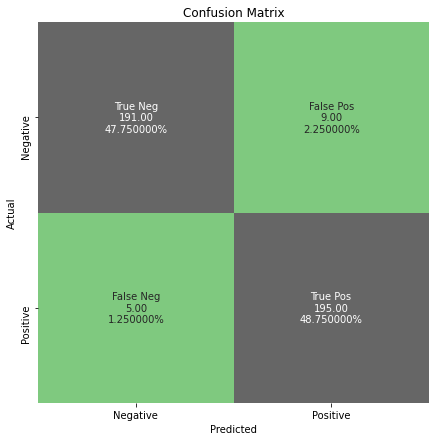

Classification Report:

               precision    recall  f1-score   support

    NEGATIVE       0.97      0.95      0.96       200
    POSITIVE       0.96      0.97      0.97       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [9]:
model_evaluation(model, test_set)

The predictive model performs brilliantly !

# 5. Conclusion

This notebook performed data preprocessing, predictive modelling and evaluation. The model achieves 96% predictive accuracy on the test set. 

Machine learning algorithms can improve healthcare decision support systems by aiding accurate and timely diagnosis. The integration of deep learning systems can add value in the healthcare industry. 